# Sesión 2: Funciones y la biblioteca matplotlib

Ya aprendimos como cargar conjuntos de datos en python como numpy arrays y DataFrames, ahora para realizar un análisis de estos datos debemos (como ya fue mencionado) tener claro nuestro objetivo para realizar distintas operaciones en nuestro conjunto de datos.
Hablando por ejemplo del negocio de lácteos de la sesión anterior, nuestro objetivo era optimizar la compra de materiales para no tener problemas de falta de producto o el caso de que el producto se pueda hechar a perder. Usando los datos que tenemos sobre la tienda de lácteos ¿cómo podemos optimizar la compra de materiales?

In [1]:
#Aquí colocamos como podemos optimizar la compra de materiales

Este tipo de operaciones pueden ser realizadas con métodos que se encuentran incluidos tanto en DataFrames como en Numpy arrays. Aun así existen casos en los que no hay métodos incluidos en estas bilbiotecas para obtener los resultados que esperamos, por esta razón utilizamos funciones:

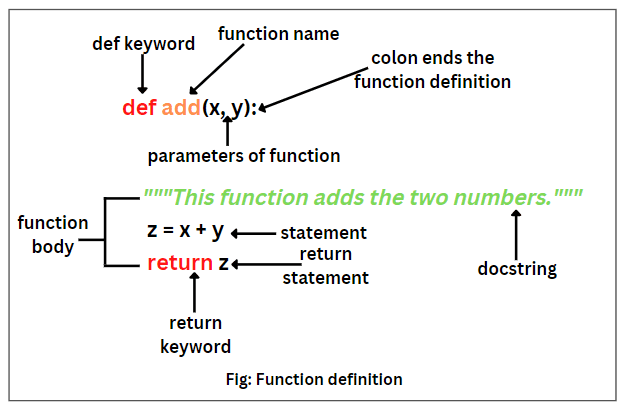

En python estas funciones comienzan con el comando `def` seguido por un nombre y una lista de parámetros, luego se ubica el método que vamos a utilizar en la función y se retorna un resultado con el comando `return`. Abajo podemos ver un ejemplo de una función que retorna el mayor entre dos números.

In [2]:
#Aquí retornamos el mayor entre dos números
def mayor(x,y):
    if (x > y):
        return x
    else:
        return y

#Aquí llamamos a la función con valores:
print("El número mayor entre 3 y 4 es: ", mayor(3,4))

El número mayor entre 3 y 4 es:  4


Este tipo de funciones pueden ser aplicadas en DataFrames o numpy arrays. Vamos a comenzar con el caso de numpy arrays, por ejemplo usando nuestro conjunto de datos de productos lácteos podemos por ejemplo encontrar cuál es el producto que ha tenido más ventas por unidades. 

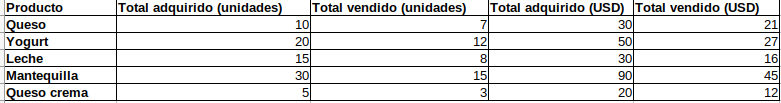

De nuestro sesión de ayer sabemos que este conjunto de datos escrito como un numpy array tiene más o menos la forma que vemos en la siguiente celda.

In [3]:
import numpy as np 
#Aquí definimos el np array para nuestro set de datos
arr = np.array( [[ 10, 7, 30, 21],
                 [ 20, 12, 50, 27],
                 [ 15, 8, 30, 16],
                 [ 30, 15, 90, 45],
                 [ 5, 3, 90, 45]])

#Aquí imprimimos el array
print("Conjunto de datos de productos lácteos: \n", arr)

#Aquí escribimos calculamos cual producto ha tenido más ventas
a = 0
for i in arr[: ,1]:
    a = mayor(a, i)

print("El producto que más ha vendido tiene: ", a, " unidades vendidas")

Conjunto de datos de productos lácteos: 
 [[10  7 30 21]
 [20 12 50 27]
 [15  8 30 16]
 [30 15 90 45]
 [ 5  3 90 45]]
El producto que más ha vendido tiene:  15  unidades vendidas


Claro que este código solo retorna el número de ventas que tuvo el producto que más se ha vendido pero ¿cómo podemos hacer que en este caso nos retorne el nombre del producto?

In [4]:
#Escribimos aquí como podemos hacer que el código nos retorne el nombre del producto que más se ha vendido

El producto que más ha vendido es:  Mantequilla


De la misma forma podemos calcular el producto que menos ha vendido ¿cómo podríamos modificar el código para que nos retorne el nombre producto que menos ha vendido?. En el caso de numpy arrays es un poco ineficiente en términos de tiempo de compilación correr el código usando loops, por esta razón es importante utilizar el mayor número de métodos incluidos en numpy para minimizar el tiempo. ¿qué método incluido en la biblioteca numpy podemos usar aquí para no tener que usar un `for` loop?

In [5]:
#Aquí escribimos como modificar el código para que nos dé el producto que menos ha vendido

El procedimiento que realizamos en este caso también puede ser realizado con un DataFrame ¿cómo? primero cargamos nuestro DataFrame

In [6]:
#Importamos la biblioteca pandas
import pandas as pd
#Aquí excribimos explícitamente nuestro DataFrame
df1 = pd.DataFrame({
    'Producto' : ["Queso", "Yogurt", "Leche", "Mantequilla", "Queso Crema"], 
    'Total adquirido (unidades)' : [10, 20, 15, 30,5], 
    'Total vendido (unidades)' : [7, 12, 8, 15, 3], 
    'Total adquirido (USD)': [30, 50, 30, 90,20], 
    'Total vendido (USD)': [21, 27,16,45,12]
    
})
print("\nDataFrame con datos de productos lácteos: \n", df1)
    


DataFrame con datos de productos lácteos: 
       Producto  Total adquirido (unidades)  Total vendido (unidades)  \
0        Queso                          10                         7   
1       Yogurt                          20                        12   
2        Leche                          15                         8   
3  Mantequilla                          30                        15   
4  Queso Crema                           5                         3   

   Total adquirido (USD)  Total vendido (USD)  
0                     30                   21  
1                     50                   27  
2                     30                   16  
3                     90                   45  
4                     20                   12  


¿Cómo podemos aplicar la misma función que aplicamos antes a nuestro DataFrame?

In [7]:
#Aquí escribimos como podemos realizar la misma operación con DataFrames

El producto que más se ha vendido es:  Mantequilla


DataFrames también pueden ser operadas con el método `.apply` que aplica una función a cada fila en un DataFrame. Abajo podemos ver como funciona este método

In [11]:
# definimos una función para calcular el precio unitario de cada 
def calculate(a, b):
    return a/b 
 
print("DataFrame original:\n", df1)
     
df1['Precio unitario'] = df1.apply(lambda row : calculate(row['Total adquirido (USD)'],
                     row['Total adquirido (unidades)']), axis = 1)

print('\nDespués de aplicar la función: ')
    # printing the new dataframe
print(df1)

DataFrame original:
       Producto  Total adquirido (unidades)  Total vendido (unidades)  \
0        Queso                          10                         7   
1       Yogurt                          20                        12   
2        Leche                          15                         8   
3  Mantequilla                          30                        15   
4  Queso Crema                           5                         3   

   Total adquirido (USD)  Total vendido (USD)  Precio unitario  
0                     30                   21              3.0  
1                     50                   27              2.5  
2                     30                   16              2.0  
3                     90                   45              3.0  
4                     20                   12              4.0  

Después de aplicar la función: 
      Producto  Total adquirido (unidades)  Total vendido (unidades)  \
0        Queso                          10         

Ahora ¿cómo podríamos determinar el producto que se vendió más utilizando el método `.apply`?

In [39]:
# Aquí colocamos como podemos deteminar cual producto se vendió más usando el método .apply

### Ejercicio 
Ahora vamos a intentar un ejercicio sobre funciones. Van a cargar el archivo con el DataFrame del día de ayer sobre los productos en la tienda de ropa y van a determinar ¿cuál es el producto que ha vendido más unidades? (esto debe ser impreso como un solo valor en la pantalla) ¿cuál es la ganancia total por producto (o pérdida) para cada uno de los productos? ¿Cuántos productos de cada tipo se deben vender para recuperar la inversión por producto? (estos dos deben ser incluidos como columnas en DataFrames) y la ganancia o pérdida total (que debe ser impresa en la pantalla como un número)

## La biblioteca Matplotlib pyplot

Ahora vamos a hablar un poco sobre la biblioteca que es utilizada en python para la visualización de datos que es `Matplotlib.pyplot`. En `Matplotlib` podemos crear todo tipo de gráficas: 1D, 2D, histogramas en 1 y 2 dimensiones, scatter plots, etc. Para crear una gráfica simple utilizamos el código abajo:

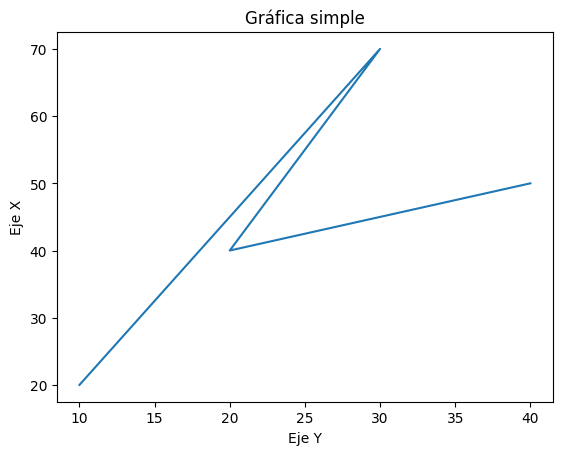

In [42]:
# Importamos la biblioteca Matplotlib.pyplot como plt
import matplotlib.pyplot as plt
  
# Inicializamos dos listas que serán usadas para crear nuestro scatter plot
x = [10, 20, 30, 40]
y = [20, 70, 40, 50]
  
# con el método plot dibujamos la gráfica
plt.plot(x, y)
  
# Definimos un título para nuestra gráfica
plt.title("Gráfica simple")
  
# Colocamos nombres a los ejes y dibujamos la gráfica
plt.ylabel("Eje X")
plt.xlabel("Eje Y")
plt.show()

El método `plot` nos retorna una gráfica con puntos unidos con líneas en el orden que se presentan en la lista, si cambiamos el orden la conexión entre los puntos también cambiará

In [ ]:
# Aquí cambiamos el orden de los puntos para observar como cambia la conexión de los puntos

En Matplotlib existen varios métodos para crear gráficas; en el caso por ejemplo que nos interese crear múltiples gráficas en una sola figura debemos tomar en cuenta los métodos `Figure` y `Axes`.`Figure` crea un objeto que contiene a sub-gráficas que puedan ser dibujadas en una misma figura. Por otro lado `Axes` crea gráficas individuales.

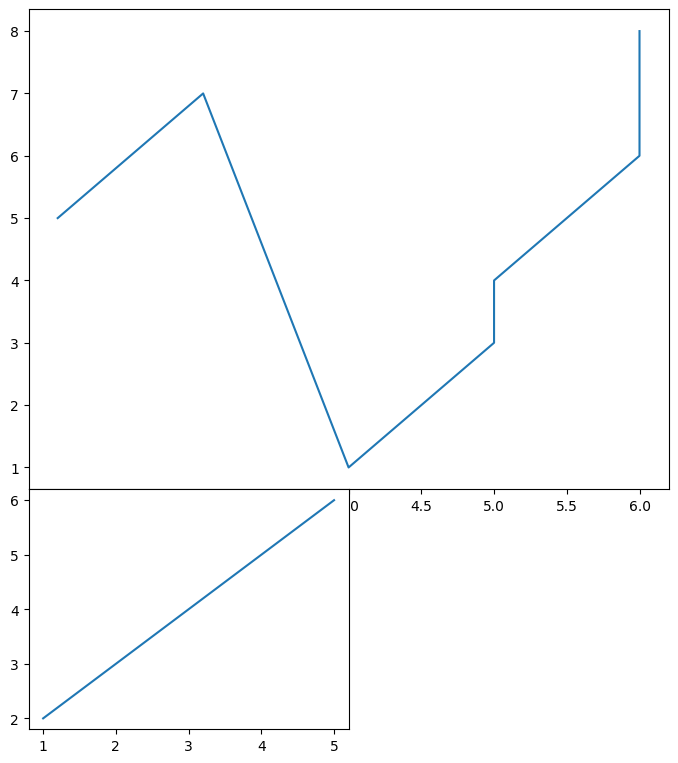

In [57]:
# Importamos el método figure de Matplotlib
from matplotlib.figure import Figure 
  
# Creamos una gráfica, ustedes pueden buscar como ajustar el tamaño
fig = plt.figure() 
  
# Creamos la primera-subgráfica con los valores [left, bottom, width, height]
ax1 = fig.add_axes([1, 1, 1, 1]) 
  
# Creamos la segunda subgráfica para la figura
ax2 = fig.add_axes([1, 0.5, 0.5, 0.5])
  
# colocamos los datos
ax1.plot([2, 3, 4, 5, 5, 6, 6], 
         [5, 7, 1, 3, 4, 6 ,8])
ax2.plot([1, 2, 3, 4, 5], 
         [2, 3, 4, 5, 6])

# Mostramos la gráfica
plt.show()

Se puede igualmente colocar dos gráficas en las misma figura:

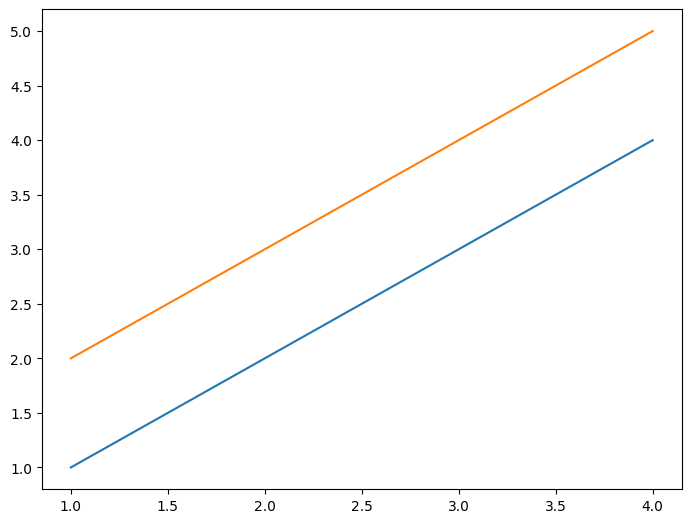

In [60]:
fig2 = plt.figure()
  
# Adding the axes to the figure
ax = fig2.add_axes([1, 1, 1, 1])
  
# plotting 1st dataset to the figure
ax3 = ax.plot([1, 2, 3, 4], [1, 2, 3, 4])
  
# plotting 2nd dataset to the figure
ax4 = ax.plot([1, 2, 3, 4], [2, 3, 4, 5])
plt.show()

Para cambiar los valores en los ejes o para limitar el máximo número que puede tener un eje usamos los métodos `set_xlim()` y `set_xticklabels` 

In [ ]:
# Aquí colocamos los métodos mencionados arriba para ver su funcionamiento 

También podemos crear sub-gráficas utilizando el método `subplot`:

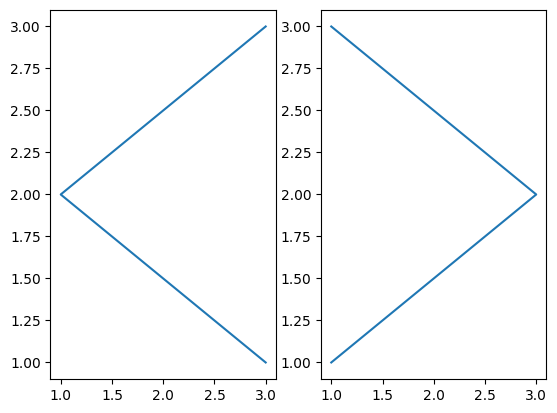

In [13]:
import matplotlib.pyplot as plt 
# Datos que vamos a usar en nuestras gráficas
x = [3, 1, 3] 
y = [3, 2, 1] 
z = [1, 3, 1] 
  
# Creamos un objeto figure 
plt.figure() 
  
# añadimos la primera sub-figura 
plt.subplot(121) 
plt.plot(x, y) 
  
# añadimos la segunda sub-figura 
plt.subplot(122) 
plt.plot(z, y)

Podemos también añadir una leyenda a nuestra gráfica para identificar elementos o escribir parámetros:

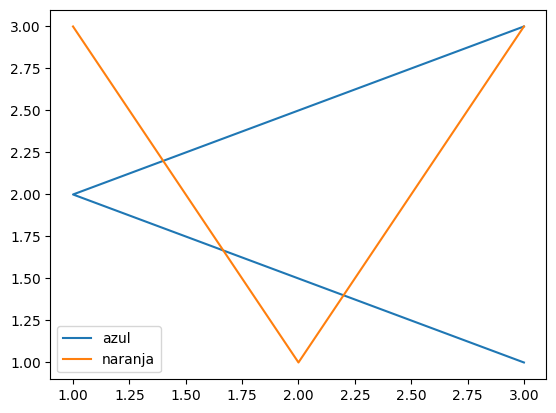

In [14]:
#definimos los datos
x = [3, 1, 3] 
y = [3, 2, 1] 
plt.plot(x, y)
plt.plot(y, x)
  
# Creamos una leyenda
plt.legend(["azul", "naranja"])
plt.show()

Para realizar diferentes tipos de gráficas utilizamos los distintos métodos en `plt`: `bar` para gráficos de barras, `hist` para histogramas, `scatter` para scatter plots, `pie` para gráficos pastel:

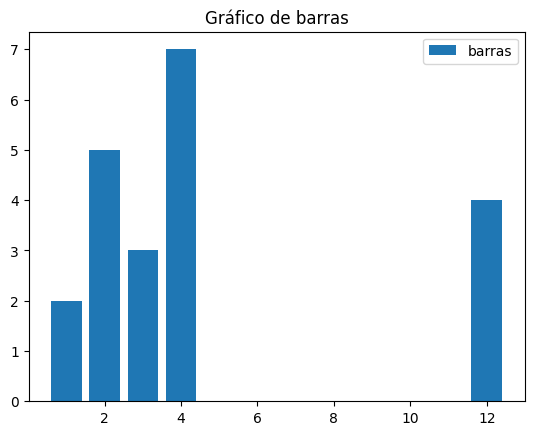

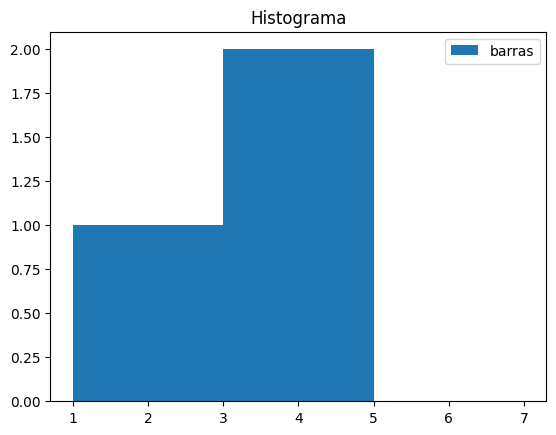

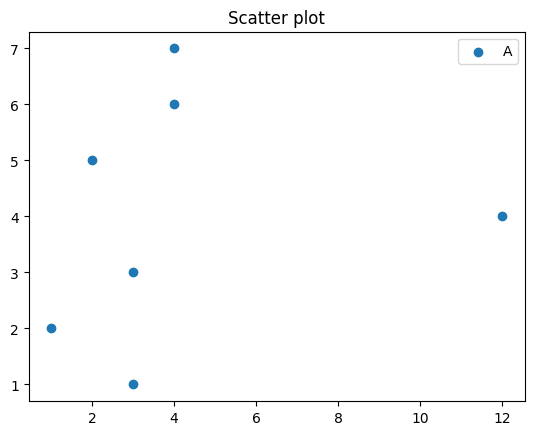

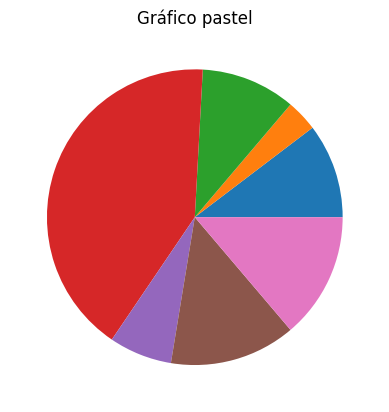

In [15]:
# Los datos que van a ser usados
x = [3, 1, 3, 12, 2, 4, 4] 
y = [3, 2, 1, 4, 5, 6, 7] 
  
# Aquí definimos un gráfico de barras
plt.bar(x, y)
  
# Título del gráfico
plt.title("Gráfico de barras")
  
# Añadims una leyenda y mostramos
plt.legend(["barras"])
plt.show()

 
# Aquí definimos un histograma
plt.hist(x, bins = [1, 2, 3, 4, 5, 6, 7])
# Título del histograma
plt.title("Histograma")
# colocamos una leyenda
plt.legend(["barras"])
plt.show()


# Aquí definimos un scatter plot
plt.scatter(x, y)
  
# Colocamos una leyenda
plt.legend("A")
  
# Título del scatter plot
plt.title("Scatter plot")
plt.show()


  
# TAquí dibujamos un gráfico pastel
plt.pie(x) 
# Título del gráfico
plt.title("Gráfico pastel")
plt.show()

## Ejercicio

Vamos a crear una figura con cuatro gráficas (un scatter plot, un histograma, un gráfico de barras y un gráfico pastel) utilizando nuestro DataFrame de la tienda de ropa. En cada una cambiamos los ejes y calocamos leyendas. Intenten también cambiar color, estilo de línea, etc; todo esto se encuentra en la documentación de Matplotlib. 
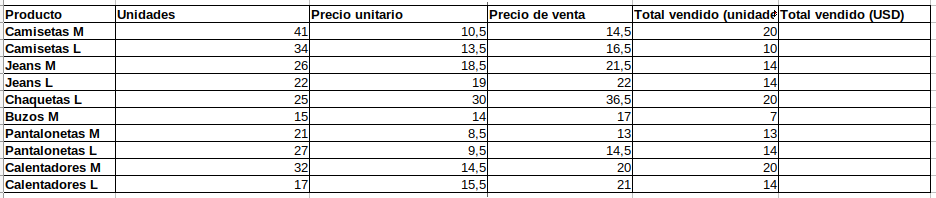